In [2]:
%matplotlib inline
import pandas
import numpy as np
df = pandas.read_csv('d.csv', index_col=0)

a = df.iloc[:, :-1]
b = df.iloc[:, 1:]
b.columns = a.columns = range(df.shape[1] - 1)
r = (b - a) / a
p = 1 / np.linalg.norm(r, axis=1)
r = (r.T * p).T.as_matrix()
l = r.shape[0]
cor = np.ones([l, l])
for i in range(l):
    for j in range(i + 1, l):
        s = (r[i] * r[j]).sum()
        cor[i][j] = s
        cor[j][i] = s
        
d = (df.as_matrix().astype(np.float32).T * p).T


c:\users\peter\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
c:\users\peter\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [33]:
zzz = np.copy(cor[742])
zzz[742] = 0
zzz[554] = 0
zzz.argmax()

342

In [5]:
%matplotlib inline
import pandas
from glob import glob
import numpy as np

df = None
t = 'week'
for a in glob('C:\\Users\\peter\\Documents\\main\\IB\\*_' + t + '.csv'):
    if df is None:
        df = pandas.read_csv(a, index_col=0).T
    else:
        df = pandas.concat([df,pandas.read_csv(a, index_col=0).T], axis=1)


In [14]:
df.as_matrix().T[[69, 383, 583, 591, 758, 761, 864, 963]]

array([[nan, nan, nan, ..., 41.45, 40.18, 41.06],
       [nan, nan, nan, ..., 1077.32, 1031.45, 1026.05],
       [nan, nan, nan, ..., 20.54, 20.35, 20.56],
       ...,
       [nan, nan, nan, ..., 29.93, 29.95, 30.32],
       [nan, nan, nan, ..., 96.24, 94.6, 93.02],
       [nan, nan, nan, ..., 36.26, 37.0, 36.54]], dtype=object)

In [ ]:
if t == 'week':
    d = df.iloc[-112:-1,:]
    d = d.dropna(axis=1,how='any').astype('float32').T
else:
    d = df.T
    
if t == 'week':
    d.to_csv('d.csv')

In [12]:
got = ['阿帕契', '谷歌A', '迈威尔科技', '美国制商银行', 'iShares Barclays Short Treasury', '标普500反向ETF', '时代华纳', '惠好']
idx = []
for g in got:
    idx.append(list(df.columns).index(g))
    
print(idx)

[69, 383, 583, 591, 758, 761, 864, 963]


In [12]:
#idx = [69, 372, 570, 578, 742, 745, 844, 939]
idx = [633, 871, 917, 968]

In [13]:
print(list(np.array(df.index)[idx]))

bad = False
for k in range(len(idx)):
    for l in range(k):
        if np.abs(cor[idx[k]][idx[l]]) > 0.75:
            bad = True
            break
    if bad:
        break
if bad:
    print('correlation too high')

['欧尼克（万欧卡）', 'iShares MSCI USA Minimum Volatil', '西部数据', '欢聚时代']


(111,)
[2.72569535 7.20256131 1.79466718 1.39055851]
0.004279707190687519 -0.24936276123936624
45


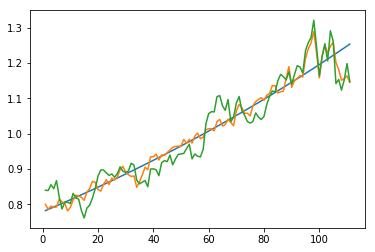

In [14]:
from matplotlib import pyplot as plt
s = (d[idx]).sum(axis=0)
print(s.shape)
print(p[idx])

m = s.mean()
s = s / m
x = np.arange(len(s)) + 1
a, b = np.polyfit(x, np.log(s), 1)
print(a, b)
y = np.exp(a * x + b)
last = s[0] < y[0]
reg = 0
for i in range(1, len(s)):
    if (s[i] < y[i]) != last:
        reg += 1
        last = s[i] < y[i]
print(reg)


plt.plot(x, y)
plt.plot(x, s)
plt.plot(x, d[372] / d[372].mean())

[1.14123595 2.75243866 3.82763359 4.53012376 4.55954086 5.06936305
 5.73218856 5.73218856 5.73218856 5.73218856 5.73218856 5.93193696
 6.81167922 8.04430701 8.04430701 8.04430701 8.04430701 8.04430701
 8.04430701 8.04430701 8.04430701 8.04430701 8.04430701 8.04430701
 8.04430701 8.04430701 8.04430701 8.04430701 8.04430701 8.04430701
 8.04430701 8.04430701 8.04430701 8.04430701 8.04430701 8.04430701
 8.04430701 8.04430701 8.04430701 8.04430701 8.04430701 8.04430701
 8.04430701 8.04430701 8.04430701 8.04430701 8.04430701 8.04430701
 8.04430701 8.04430701 8.04430701 8.04430701 8.04430701 8.04430701
 8.04430701 8.04430701 8.04430701 8.04430701 8.04430701 8.04430701
 8.04430701 8.04430701 8.04430701 8.04430701 8.04430701 8.04430701
 8.04430701 8.04430701 8.04430701 8.04430701 8.04430701 8.04430701
 8.04430701 8.04430701 8.04430701 8.04430701 8.04430701 8.04430701
 8.04430701 8.04430701 8.04430701 8.04430701 8.04430701 8.04430701
 8.04430701 8.04430701 8.04430701 8.04430701 8.04430701 8.0443

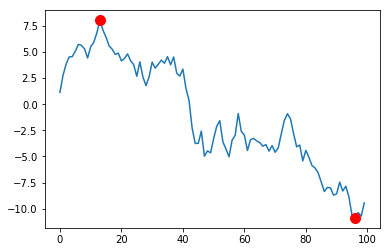

In [11]:
n = 100
xs = np.random.randn(n).cumsum()
print(np.maximum.accumulate(xs))
i = np.argmax(np.maximum.accumulate(xs) - xs) # end of the period
j = np.argmax(xs[:i]) # start of period

plt.plot(xs)
plt.plot([i, j], [xs[i], xs[j]], 'o', color='Red', markersize=10)